# <span style="background-color: #F1F0F0; padding: 5px;">Introduction</span>

### Background:
> The aviation industry has long been dominated by two major players: <span style="color: #0039A6; font-weight: bold;">Boeing</span> and <span style="color: #2eb7ce; font-weight: bold;">Airbus</span>. Both companies have a storied history and have provided countless airlines with the fleets they use to transport passengers and cargo across the globe. This analysis aims to delve into a dataset containing fleet data to compare these two giants on various fronts, such as aircraft counts, costs, historical presence, and future projections.

### Objectives:
> 1. Understand and compare the market presence of <span style="color: #0039A6; font-weight: bold;">Boeing</span> and <span style="color: #2eb7ce; font-weight: bold;">Airbus</span> in terms of aircraft numbers, types, and associated costs.
> 2. Determine airline preferences between the two manufacturers.
> 3. Analyze historical data to see past trends and compare them with future projections to predict potential market dynamics.

### Dataset Includes:
> **Parent Airline**: i.e. International Airlines Group (IAG)  
> **Airline**: i.e. Iberia, Aer Lingus, British Airways…etc. which are owned by IAG  
> **Aircraft Type**: Manufacturer & Model  
> **Current**: Quantity of airplanes in Operation  
> **Future**: Quantity of airplanes on order, from planespotter.net  
> **Order**: Quantity airplanes on order, from Wikipedia  
> **Unit Cost**: Average unit cost (\$M) of Aircraft Type, as found by Wikipedia and various google searches  
> **Total Cost**: Current quantity * Unit Cost (\$M)  
> **Average Age**: Average age of "Current" airplanes by "Aircraft Type"

# <span style="background-color: #F1F0F0; padding: 5px;">Data Loading</span>

In [1]:
# Import necessary libraries
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv('/kaggle/input/airlinefleet/Fleet Data.csv')

In [2]:
df.head()

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90,$90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$90,$0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,$98,"$3,724",7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$98,$0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$115,$919,10.3


In [3]:
df.tail()

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
1578,WestJet,WestJet,Boeing 757,NaN,NaN,1.0,1.0,NaN,$73,$0,NaN
1579,WestJet,WestJet,Boeing 767,4.0,NaN,NaN,4.0,NaN,$187,$748,24.5
1580,WestJet,WestJet Encore,De Havilland Canada DHC-8 Dash 8,33.0,NaN,NaN,33.0,9.0,$31,"$1,033",2.0
1581,Wizz Air,Wizz Air,Airbus A320,63.0,NaN,9.0,72.0,8.0,$98,"$6,174",5.1
1582,Wizz Air,Wizz Air,Airbus A321,11.0,4.0,NaN,15.0,129.0,$115,"$1,264",0.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Parent Airline        1583 non-null   object 
 1   Airline               1583 non-null   object 
 2   Aircraft Type         1583 non-null   object 
 3   Current               859 non-null    float64
 4   Future                188 non-null    float64
 5   Historic              1113 non-null   float64
 6   Total                 1484 non-null   float64
 7   Orders                348 non-null    float64
 8   Unit Cost             1548 non-null   object 
 9   Total Cost (Current)  1556 non-null   object 
 10  Average Age           820 non-null    float64
dtypes: float64(6), object(5)
memory usage: 136.2+ KB


In [5]:
df.describe()

,Current,Future,Historic,Total,Orders,Average Age
count,859.000000,188.000000,1113.000000,1484.000000,348.000000,820.000000
mean,24.033760,3.382979,14.513028,24.955526,26.419540,10.115000
std,41.091234,4.656331,23.763373,46.651526,43.024179,6.859362
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000
25%,5.000000,1.000000,3.000000,4.000000,5.000000,5.000000
50%,12.000000,2.000000,7.000000,11.000000,13.500000,8.900000
75%,26.500000,4.000000,16.000000,27.000000,28.250000,14.500000
max,718.000000,38.000000,325.000000,952.000000,400.000000,39.000000


#### Based on the initial inspection of dataset, the dataset includes:
> **Parent Airline**: The overarching company or group that owns the airline (i.e. International Airline Groups)\
> **Airline**: The specific airline names (i.e. Aegean Airlnes, Olympic Air, WestJet, Wizz Air)\
> **Aircraft Type**: Type of aircraft (i.e. Airbus A319, Beoing 757)\
> **Current**: Number of currently active aircraft of the mentioned type for the airline\
> **Future**: Number of aircraft of the menotioned type that the airline plan to add in the future\
> **Historic**: Number of aircraft of the mentioned type that the airline used in the past\
> **Total**: Totel number of aircraft of the mentioned type for the airline\
> **Orders**: Number of orders placed for the aircraft\
> **Unit Cost**: Cost of one unit of the aircraft\
> **Total Cost (Current)**: Total cost of the current aircraft\
> **Average Age**: Average age of the aircrafts of the mentioned type for the airline

# <span style="background-color: #F1F0F0; padding: 5px;">Data Pre-processing and Cleaning</span>

In [6]:
# Fill NaN values in specific columns with 0 and convert to integer
columns = ["Current", "Future", "Historic", "Total", "Orders"]
for col in columns:
    df[col].fillna(0, inplace=True)
    df[col] = df[col].astype(int)

# Convert currency columns to float
df['Unit Cost'] = df['Unit Cost'].str.replace('$', '').astype(float)
df['Total Cost (Current)'] = df['Total Cost (Current)'].str.replace(',', '').str.replace('$', '').astype(float)

# Remove duplicates
df.drop_duplicates(inplace=True)

In [7]:
df.head()

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1,0,3,4,0,90.0,90.0,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,0,0,8,8,0,90.0,0.0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38,0,3,41,0,98.0,3724.0,7.5
3,Aegean Airlines,Olympic Air,Airbus A320,0,0,9,9,0,98.0,0.0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8,0,0,8,0,115.0,919.0,10.3


# <span style="background-color: #F1F0F0; padding: 5px;">Data Analysis</span>

#### 1. Aircraft Count Analysis
   Narrow down the dataset to specifically focus on two major aircraft manufactures: <span style="color: #0039A6; font-weight: bold;">Boeing</span> and <span style="color: #2eb7ce; font-weight: bold;">Airbus</span>

In [8]:
# Filter data for Boeing and Airbus
boeing = df[df['Aircraft Type'].str.contains('Boeing')]
airbus = df[df['Aircraft Type'].str.contains('Airbus')]

In [9]:
boeing.head()

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
7,Aegean Airlines,Aegean Airlines,Boeing 737,0,0,17,17,0,74.0,0.0,NaN
22,Aeroflot,Aeroflot,Boeing 737,20,1,16,37,26,74.0,1480.0,1.6
23,Aeroflot,Pobeda,Boeing 737,12,0,0,12,0,74.0,888.0,2.1
24,Aeroflot,Rossiya Airlines,Boeing 737,17,1,5,23,0,74.0,1258.0,9.6
25,Aeroflot,Aurora Airlines,Boeing 737,0,0,5,5,0,74.0,0.0,NaN


In [10]:
airbus.head()

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1,0,3,4,0,90.0,90.0,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,0,0,8,8,0,90.0,0.0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38,0,3,41,0,98.0,3724.0,7.5
3,Aegean Airlines,Olympic Air,Airbus A320,0,0,9,9,0,98.0,0.0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8,0,0,8,0,115.0,919.0,10.3


In [11]:
boeing_aircraft_count = boeing.groupby('Aircraft Type')['Total'].sum()
airbus_aircraft_count = airbus.groupby('Aircraft Type')['Total'].sum()

In [12]:
boeing_aircraft_count

Aircraft Type
Boeing 717                180
Boeing 727                122
Boeing 737               9290
Boeing 737-800              0
Boeing 747               1858
Boeing 757               1236
Boeing 767               1371
Boeing 777               1509
Boeing 777-300              0
Boeing 787                 16
Boeing 787 Dreamliner     523
Name: Total, dtype: int64

In [13]:
airbus_aircraft_count

Aircraft Type
Airbus A300         595
Airbus A310         355
Airbus A318          56
Airbus A319        1494
Airbus A320        4310
Airbus A320-200       0
Airbus A321        1458
Airbus A321neo        0
Airbus A330        1395
Airbus A340         445
Airbus A350          36
Airbus A350 XWB     104
Airbus A350-900       0
Airbus A380         222
Name: Total, dtype: int64

#### 2. Cost Analysis
   We delve into the financial aspects of the aircrafts from both manuafactures.

In [14]:
total_cost_boeing = boeing['Total Cost (Current)'].sum()
total_cost_airbus = airbus['Total Cost (Current)'].sum()
avg_unit_cost_boeing = boeing['Unit Cost'].mean()
avg_unit_cost_airbus = airbus['Unit Cost'].mean()

In [15]:
print(total_cost_boeing)
print(total_cost_airbus)
print(avg_unit_cost_boeing)
print(avg_unit_cost_airbus)

1179299.0
978107.0
170.08387096774194
147.12333965844402


#### 3. Orders Analysis
   Analyze the demand for aircraft from both <span style="color: #0039A6; font-weight: bold;">Boeing</span> and <span style="color: #2eb7ce; font-weight: bold;">Airbus</span> by examining the number of orders placed for each manufacturer.

In [16]:
orders_boeing = boeing['Orders'].sum()
orders_airbus = airbus['Orders'].sum()

In [17]:
print(orders_boeing)
print(orders_airbus)

3450
4661


#### 4. Airlines Preference
   Explore which airlines show a preference for <span style="color: #0039A6; font-weight: bold;">Boeing</span> and <span style="color: #2eb7ce; font-weight: bold;">Airbus</span> aircraft based on the number of aircraft they operate from each manufacturer.

In [18]:
airlines_preference_boeing = boeing.groupby('Airline')['Total'].sum().sort_values(ascending=False)
airlines_preference_airbus = airbus.groupby('Airline')['Total'].sum().sort_values(ascending=False)

In [19]:
airlines_preference_boeing

Airline
United Airlines               1081
Southwest Airlines             952
American Airlines              757
Delta Airlines                 752
RyanAir                        476
                              ... 
Swiss Global Airlines            0
Chang An Airlines (67.01%)       0
LATAM Airlines Ecuador           0
LATAM Airlines Peru              0
Qantas Freight                   0
Name: Total, Length: 185, dtype: int64

In [20]:
airlines_preference_airbus

Airline
American Airlines          462
China Eastern Airlines     382
Lufthansa                  349
China Southern Airlines    329
easyJet                    308
                          ... 
Lufthansa CityLine           0
SunExpress Deutschland       0
Philippines AirAsia          0
Qatar Executive              0
Malindo Air                  0
Name: Total, Length: 176, dtype: int64

#### 5. Historical vs. Future Projections
   Contrast the historical presence of <span style="color: #0039A6; font-weight: bold;">Boeing</span> and <span style="color: #2eb7ce; font-weight: bold;">Airbus</span> aircraft against projections for their future numbers

In [21]:
historical_count_boeing = boeing['Historic'].sum()
future_count_boeing = boeing['Future'].sum()
historical_count_airbus = airbus['Historic'].sum()
future_count_airbus = airbus['Future'].sum()

In [22]:
print(historical_count_boeing)
print(future_count_boeing)
print(historical_count_airbus)
print(future_count_airbus)

7091
246
2794
311


# <span style="background-color: #F1F0F0; padding: 5px;">Data Visualization</span>

In [23]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set_style("whitegrid")
airbus_color = '#2eb7ce'
boeing_color = '#0039A6'

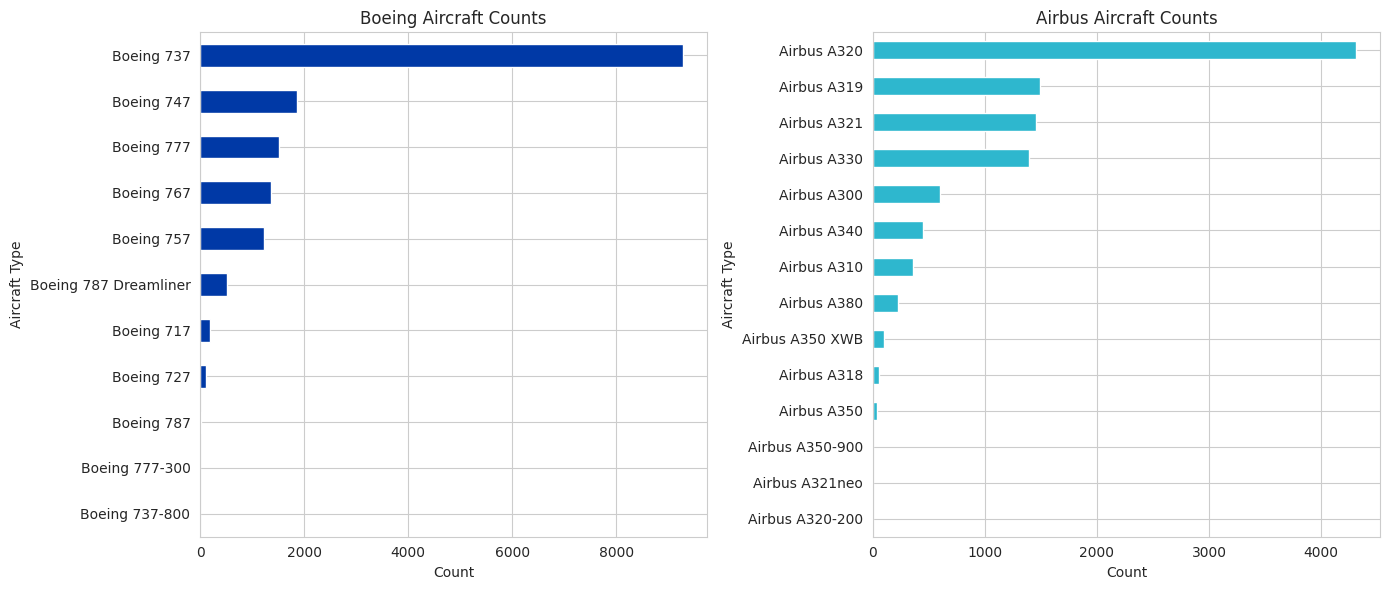

In [24]:
# 1. Aircraft Count Analysis
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
boeing_aircraft_count.sort_values().plot(kind='barh', color=boeing_color)
plt.title('Boeing Aircraft Counts')
plt.xlabel('Count')
plt.ylabel('Aircraft Type')

plt.subplot(1, 2, 2)
airbus_aircraft_count.sort_values().plot(kind='barh', color=airbus_color)
plt.title('Airbus Aircraft Counts')
plt.xlabel('Count')
plt.ylabel('Aircraft Type')

plt.tight_layout()
plt.show()

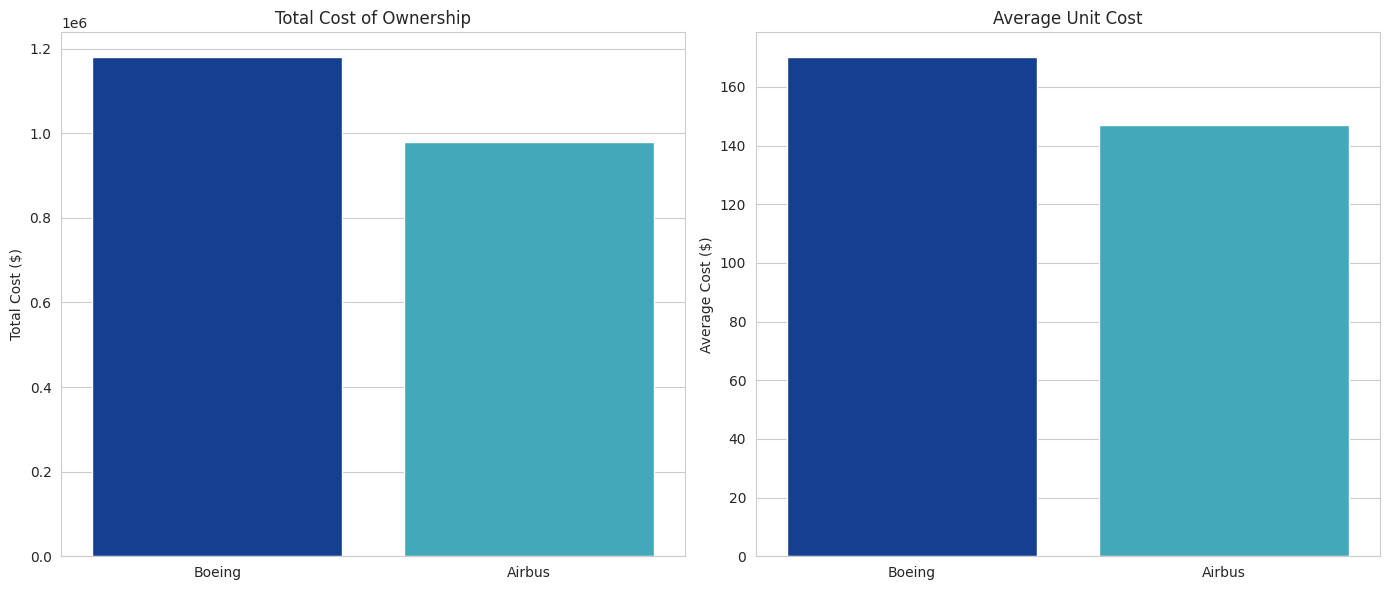

In [25]:
# 2. Cost Analysis
labels = ['Boeing', 'Airbus']
total_costs = [total_cost_boeing, total_cost_airbus]
avg_costs = [avg_unit_cost_boeing, avg_unit_cost_airbus]
colors = [boeing_color, airbus_color]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=total_costs, palette=colors)
plt.title('Total Cost of Ownership')
plt.ylabel('Total Cost ($)')

plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=avg_costs, palette=colors)
plt.title('Average Unit Cost')
plt.ylabel('Average Cost ($)')

plt.tight_layout()
plt.show()

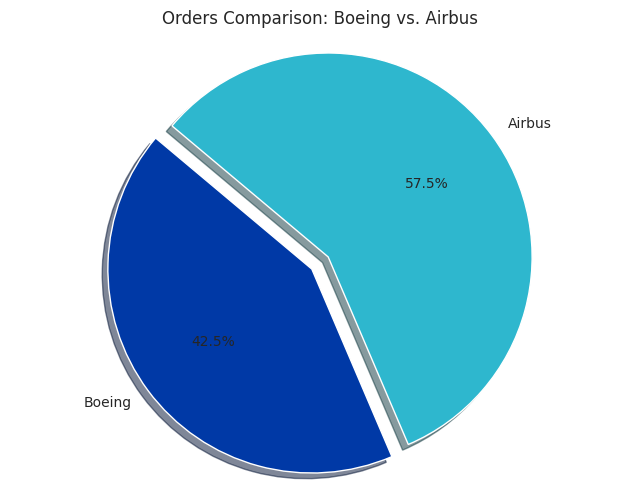

In [26]:
# 3. Orders Analysis
labels = ['Boeing', 'Airbus']
sizes = [orders_boeing, orders_airbus]
colors = [boeing_color, airbus_color]
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Orders Comparison: Boeing vs. Airbus')
plt.axis('equal')
plt.show()

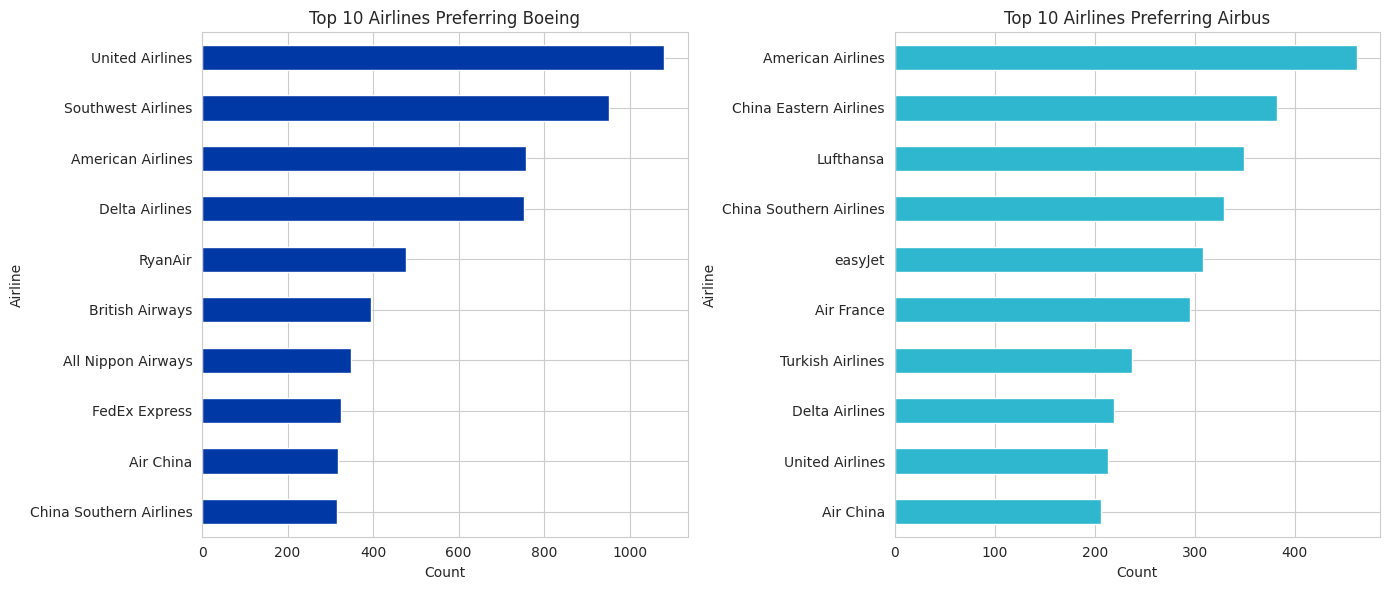

In [27]:
# 4. Airlines Preference Analysis
top_n = 10
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
airlines_preference_boeing.head(top_n).sort_values().plot(kind='barh', color=boeing_color)
plt.title('Top 10 Airlines Preferring Boeing')
plt.xlabel('Count')
plt.ylabel('Airline')

plt.subplot(1, 2, 2)
airlines_preference_airbus.head(top_n).sort_values().plot(kind='barh', color=airbus_color)
plt.title('Top 10 Airlines Preferring Airbus')
plt.xlabel('Count')
plt.ylabel('Airline')

plt.tight_layout()
plt.show()

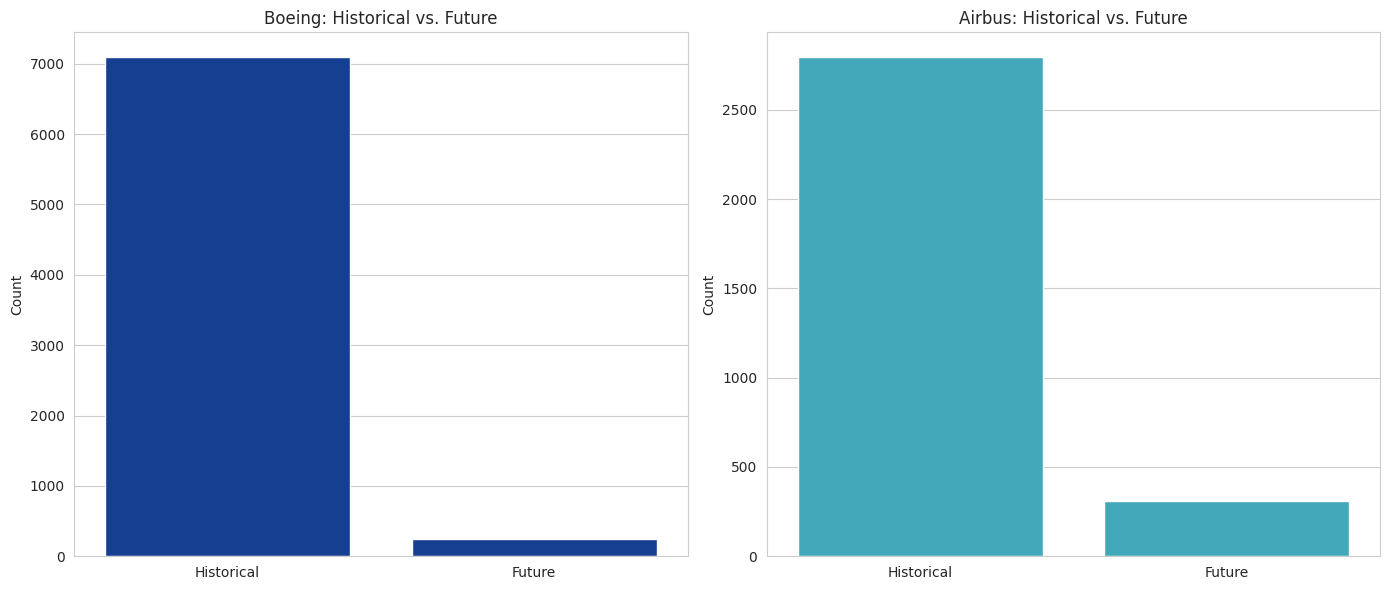

In [28]:
# 5. Historical vs. Future Projections
labels = ['Historical', 'Future']
boeing_counts = [historical_count_boeing, future_count_boeing]
airbus_counts = [historical_count_airbus, future_count_airbus]
colors_boeing = [boeing_color, boeing_color]
colors_airbus = [airbus_color, airbus_color]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=boeing_counts, palette=colors_boeing)
plt.title('Boeing: Historical vs. Future')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=airbus_counts, palette=colors_airbus)
plt.title('Airbus: Historical vs. Future')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# <span style="background-color: #F1F0F0; padding: 5px;">Conclusion</span>

> 1. Historically, <span style="color: #0039A6; font-weight: bold;">Boeing</span> has had a larger presence in terms of aircraft numbers, potentially due to its earlier establishment compared to <span style="color: #2eb7ce; font-weight: bold;">Airbus</span>.
> 2. <span style="color: #2eb7ce; font-weight: bold;">Airbus</span> seems to be gaining traction in recent times, as indicated by the higher number of orders placed for Airbus aircraft.
> 3. While the total cost of ownership for <span style="color: #0039A6; font-weight: bold;">Boeing</span> aircraft is higher, <span style="color: #2eb7ce; font-weight: bold;">Airbus</span> offers a slightly lower average unit cost per aircraft.
> 4. Several major airlines, such as American Airlines and Air China, operate a significant number of aircraft from both manufacturers, showcasing a diversified fleet strategy.
> 5. In the ever-evolving landscape of the aviation industry, both <span style="color: #0039A6; font-weight: bold;">Boeing</span> and <span style="color: #2eb7ce; font-weight: bold;">Airbus</span> continue to play pivotal roles. While historical data showcases past preferences and trends, future projections hint at possible shifts in the industry dynamics. As both manufacturers roll out new models and technologies, the balance might shift, making continuous analysis crucial for understanding the industry's trajectory.